# **Caso Práctico: Predicción de Demanda de Talento a Futuro**

### **Introducción**

En este caso práctico, aprenderás a utilizar técnicas de ciencia de datos para prever la demanda futura de talento en una empresa ficticia. Para ello, trabajarás con un dataset generado específicamente para este ejercicio, el cual incluye información histórica sobre contrataciones, rotación de empleados, crecimiento de la empresa, y otras variables relevantes.

**Descripción del problema**

La gestión eficiente del talento humano es clave para cualquier organización. Saber cuándo y dónde se necesitarán nuevos empleados permite a las empresas tomar decisiones informadas sobre la atracción y retención de talento. Este tipo de predicciones es fundamental para reducir costos, optimizar recursos, y mantener la competitividad en el mercado.

**Importancia de la predicción de necesidades de talento**

Al utilizar herramientas de análisis predictivo, los equipos de recursos humanos pueden:
- Planificar mejor los procesos de contratación.
- Identificar áreas o departamentos con mayor rotación.
- Anticiparse a las necesidades organizacionales en función del crecimiento.

### **Breve explicación del dataset**
El dataset proporcionado contiene 5000 registros y las siguientes columnas clave:
- **Años_Experiencia**: Promedio de años de experiencia de los empleados.
- **Edad**: Edad promedio de los empleados.
- **Nivel_Educativo**: Nivel educativo alcanzado (Secundaria, Técnico, Universitario, Postgrado).
- **Industria**: Sector en el que opera la empresa.
- **Departamento**: Departamento al que pertenecen los empleados (e.g., Ventas, Desarrollo).
- **Tasa_Rotación**: Porcentaje estimado de empleados que podrían abandonar la empresa.
- **Crecimiento_Empresa**: Porcentaje de crecimiento anual de la empresa.
- **Demanda_Actual_Talento**: Número actual de empleados necesarios en cada departamento.
- **Satisfacción_Laboral**: Puntuación en una escala de 1 a 5.
- **Género**: Distribución entre Masculino, Femenino y Otro.
- **Salario_Anual**: Rango salarial promedio por empleado (en miles).
- **Demanda_Futura_Talento**: **Variable objetivo**, que indica la demanda proyectada de empleados.

### **Importación de librerías**

In [ ]:
# Carga de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### **Carga de datos**

In [ ]:
# Cargar el dataset
datos = pd.read_csv("Dataset_Prediccion_Demanda_Talento.csv")

In [ ]:
# Exploración inicial del dataset
print("Primeras filas del dataset")
datos.head()

Primeras filas del dataset


,Años_Experiencia,Edad,Nivel_Educativo,Industria,Departamento,Tasa_Rotación,Crecimiento_Empresa,Demanda_Actual_Talento,Demanda_Futura_Talento,Satisfaccion_Laboral,Genero,Salario_Anual
0,6.0,32.0,Técnico,Salud,Recursos Humanos,0.100,0.096,7,8,4,Masculino,30000
1,4.7,31.0,Postgrado,Tecnología,Finanzas,0.058,0.029,25,26,4,Masculino,66000
2,6.3,21.0,Secundaria,Educación,Operaciones,0.114,0.076,20,23,1,Masculino,23000
3,8.0,32.0,Universitario,Tecnología,Ventas,0.209,0.020,42,51,3,Femenino,46000
4,4.5,41.0,Secundaria,Finanzas,Desarrollo,0.122,0.068,30,34,4,Masculino,20000


In [ ]:
print("Información general del dataset:")
datos.info()

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Años_Experiencia        5000 non-null   float64
 1   Edad                    5000 non-null   float64
 2   Nivel_Educativo         5000 non-null   object 
 3   Industria               5000 non-null   object 
 4   Departamento            5000 non-null   object 
 5   Tasa_Rotación           5000 non-null   float64
 6   Crecimiento_Empresa     5000 non-null   float64
 7   Demanda_Actual_Talento  5000 non-null   int64  
 8   Demanda_Futura_Talento  5000 non-null   int64  
 9   Satisfaccion_Laboral    5000 non-null   int64  
 10  Genero                  5000 non-null   object 
 11  Salario_Anual           5000 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 468.9+ KB


### **Exploración y Análisis Inicial del Dataset**

El objetivo es entender los datos y su distribución para identificar patrones clave que informen nuestro modelo predictivo.

#### **Estadísticas descriptivas del dataset**
Para comenzar, revisaremos las estadísticas descriptivas del dataset y verificaremos si hay valores nulos o anómalos:

In [ ]:
print("Resumen estadístico de las variables numéricas:")
datos.describe()

Resumen estadístico de las variables numéricas:


,Años_Experiencia,Edad,Tasa_Rotación,Crecimiento_Empresa,Demanda_Actual_Talento,Demanda_Futura_Talento,Satisfaccion_Laboral,Salario_Anual
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5.015540,34.972200,0.151632,0.055024,27.086200,31.437600,2.987600,44309.400000
std,1.981717,7.961941,0.057893,0.025866,13.107034,15.552211,1.418679,17348.125637
min,0.000000,18.000000,0.050000,0.010000,5.000000,5.000000,1.000000,20000.000000
25%,3.700000,30.000000,0.102000,0.033000,16.000000,18.000000,2.000000,30000.000000
50%,5.000000,35.000000,0.153000,0.055000,27.000000,31.000000,3.000000,39000.000000
75%,6.300000,40.000000,0.201000,0.077000,38.000000,45.000000,4.000000,59000.000000
max,12.900000,63.000000,0.250000,0.100000,49.000000,63.000000,5.000000,79000.000000


In [ ]:
print("Valores nulos en el dataset")
print(datos.isnull().sum())

Valores nulos en el dataset
Años_Experiencia          0
Edad                      0
Nivel_Educativo           0
Industria                 0
Departamento              0
Tasa_Rotación             0
Crecimiento_Empresa       0
Demanda_Actual_Talento    0
Demanda_Futura_Talento    0
Satisfaccion_Laboral      0
Genero                    0
Salario_Anual             0
dtype: int64


### **Visualizaciones clave**

#### **Análisis de Histogramas para Variables Numéricas**

Los histogramas son herramientas visuales que permiten analizar la distribución de las variables numéricas. Ayudan a identificar patrones como simetría, asimetría, valores atípicos y concentraciones de datos, proporcionando una visión general de cada variable.


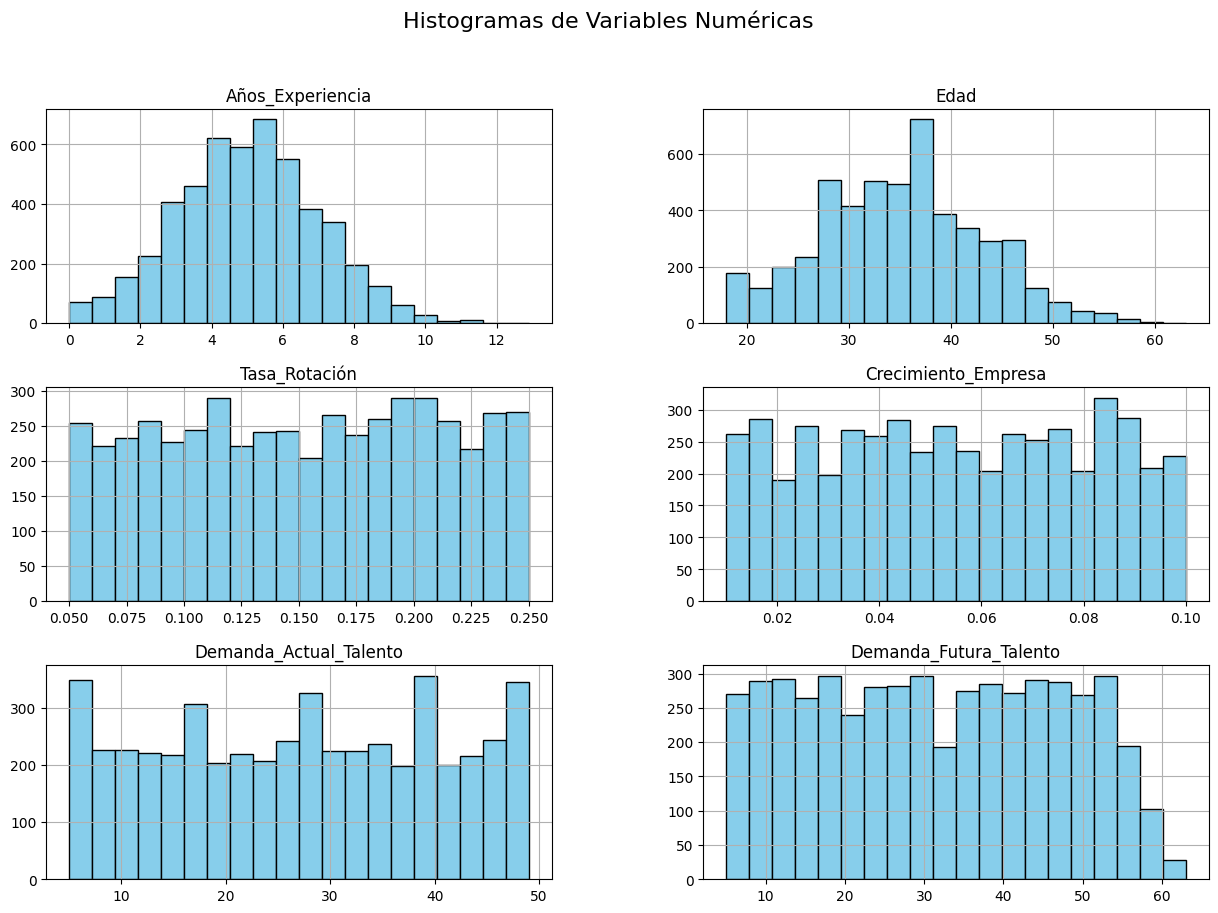

In [ ]:
# Histogramas para variables numéricas
columnas_numericas = ['Años_Experiencia', 'Edad', 'Tasa_Rotación', 'Crecimiento_Empresa', 'Demanda_Actual_Talento', 'Demanda_Futura_Talento']
datos[columnas_numericas].hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histogramas de Variables Numéricas", fontsize=16)
plt.show()

#### **Gráficos de Barras para Variables Categóricas**

Los gráficos de barras son herramientas visuales que permiten analizar la distribución de las categorías en variables cualitativas. Estos gráficos facilitan la identificación de patrones, diferencias y tendencias en los datos categóricos.


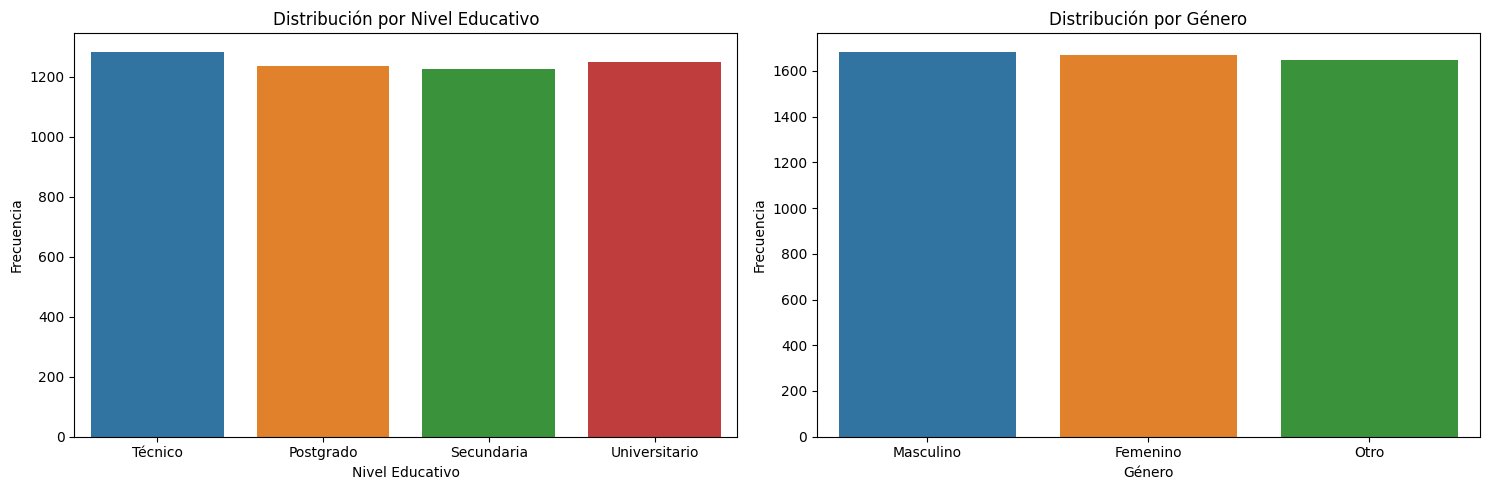

In [ ]:
# Gráficos de barras para variables categóricas
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data=datos, x='Nivel_Educativo', ax=ax[0], hue='Nivel_Educativo')
ax[0].set_title("Distribución por Nivel Educativo")
ax[0].set_ylabel("Frecuencia")
ax[0].set_xlabel("Nivel Educativo")
sns.countplot(data=datos, x='Genero', ax=ax[1], hue='Genero')
ax[1].set_title("Distribución por Género")
ax[1].set_ylabel("Frecuencia")
ax[1].set_xlabel("Género")
plt.tight_layout()
plt.show()

#### **Boxplots para Analizar la Relación entre Satisfacción Laboral y Demanda Futura de Talento**

El gráfico de caja y bigotes (**boxplot**) es una herramienta visual útil para explorar la relación entre una variable categórica y una variable numérica. En este caso, se analiza cómo varía la **Demanda Futura de Talento** en función de los niveles de **Satisfacción Laboral**.


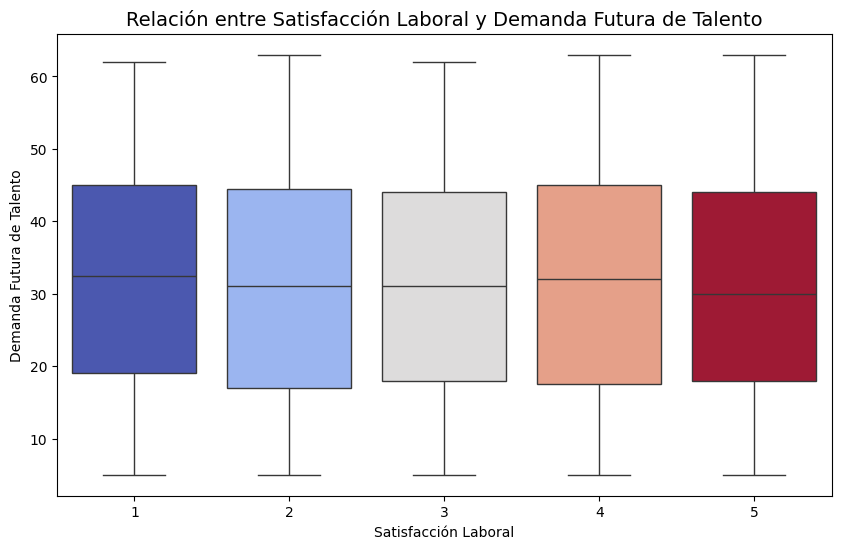

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=datos, x='Satisfaccion_Laboral', y='Demanda_Futura_Talento', palette='coolwarm',hue='Satisfaccion_Laboral', legend=False)
plt.title("Relación entre Satisfacción Laboral y Demanda Futura de Talento", fontsize=14)
plt.xlabel("Satisfacción Laboral")
plt.ylabel("Demanda Futura de Talento")
plt.show()

#### **Detección y Manejo de Valores Nulos o Atípicos**

Los **boxplots** son herramientas visuales que permiten identificar valores atípicos (outliers) en las variables numéricas. Este análisis es crucial para garantizar la calidad de los datos antes de realizar análisis más avanzados.


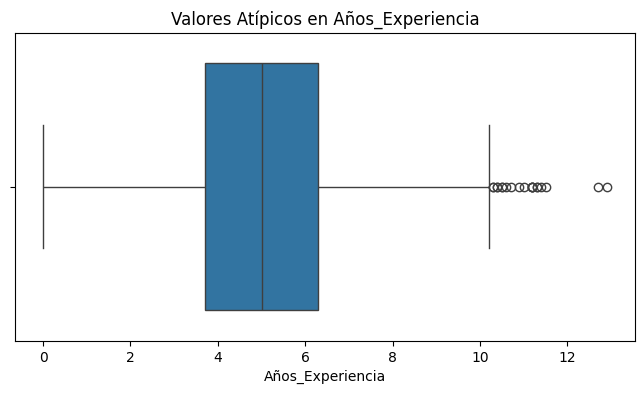

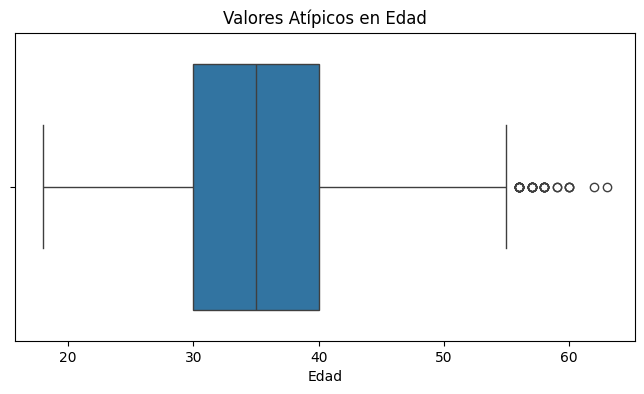

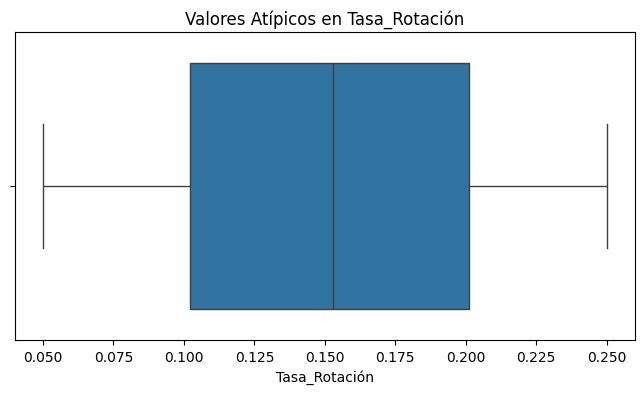

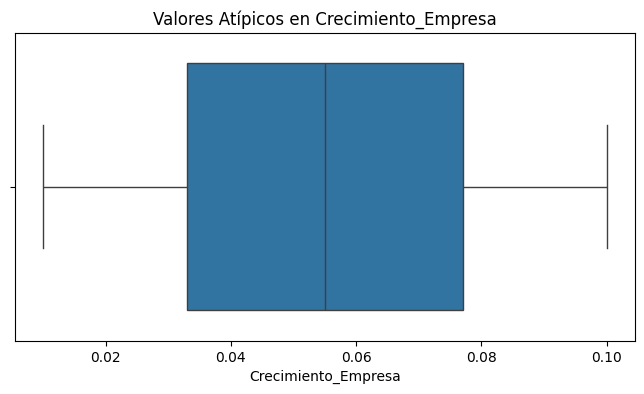

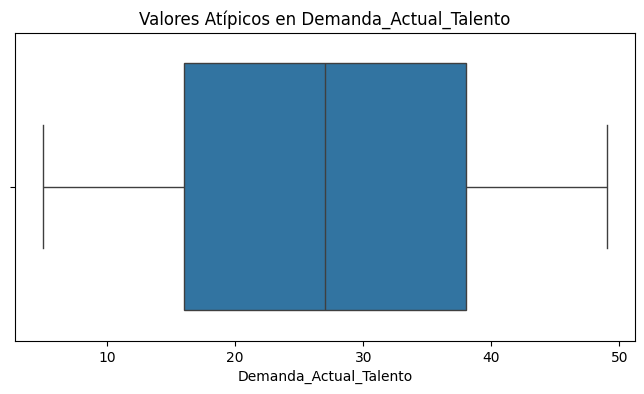

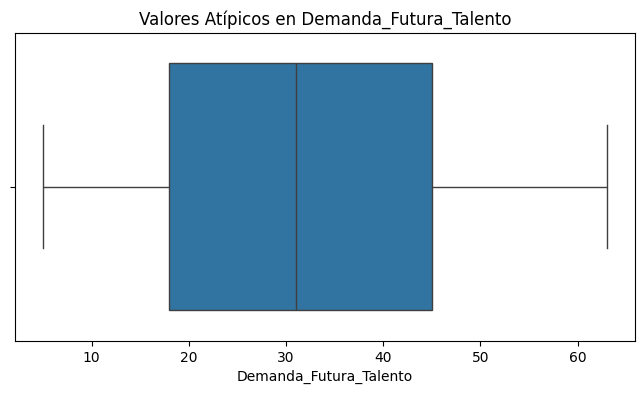

In [ ]:
# Detección y manejo de valores nulos o atípicos
for columna in columnas_numericas:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=datos[columna], legend=False)
    plt.title(f"Valores Atípicos en {columna}")
    plt.show()

### **Selección y Preparación de Características**

Preparar las variables del dataset para entrenar un modelo predictivo de alta calidad. Este paso incluye la identificación de las variables más relevantes, codificación de variables categóricas, normalización de variables numéricas y la división del dataset en conjuntos de entrenamiento y prueba.


In [ ]:
# Preparar variables
X = datos.drop(columns=['Demanda_Futura_Talento'])
y = datos['Demanda_Futura_Talento']

## Codificación One-Hot de Variables Categóricas

Para preparar los datos categóricos para el análisis, utilizamos **One-Hot Encoding**, una técnica que convierte las variables categóricas en variables binarias. Esto asegura que las variables puedan ser interpretadas correctamente por los algoritmos de machine learning.

- La codificación crea una nueva columna para cada categoría única de las variables seleccionadas. Para evitar multicolinealidad, eliminamos la primera categoría de cada variable (`drop='first'`).


In [ ]:
# Codificar la columnas categóricas
encoder = OneHotEncoder(drop='first', sparse_output=False)
categoricas = ['Nivel_Educativo', 'Industria', 'Genero', 'Departamento']
encoded_categoricas = encoder.fit_transform(X[categoricas])
categoricas_encoded_df = pd.DataFrame(encoded_categoricas, columns=encoder.get_feature_names_out(categoricas))

In [ ]:
# Unir datos codificados al resto de las variables
X = pd.concat([X.drop(columns=categoricas), categoricas_encoded_df], axis=1)

## Normalización de Variables Numéricas

Para asegurar que las variables numéricas tengan escalas comparables y evitar que los algoritmos de machine learning sean sesgados por la magnitud de los datos, aplicamos **normalización**. La normalización transforma los datos numéricos a una distribución con media 0 y desviación estándar 1.


La técnica utilizada es **Estandarización (StandardScaler)**, que transforma cada valor usando la fórmula:

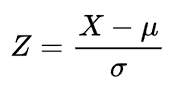

  donde:
  - X es el valor original.
  - μ es la media de la columna.
  - σ es la desviación estándar de la columna.

In [ ]:
# Normalización de variables numéricas
escalador = StandardScaler()
numericas = ['Años_Experiencia', 'Edad', 'Tasa_Rotación', 'Crecimiento_Empresa', 'Satisfaccion_Laboral', 'Salario_Anual']
X[numericas] = escalador.fit_transform(X[numericas])

In [ ]:
# División del dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (4000, 20)
Tamaño del conjunto de prueba: (1000, 20)


## **Implementación del Modelo Predictivo**

### **Modelo de Regresión Lineal**

La **Regresión Lineal** es uno de los métodos más básicos y ampliamente utilizados en análisis predictivo. Se emplea para modelar la relación entre una variable dependiente (respuesta) y una o más variables independientes (predictoras).

### Descripción:
- **Regresión lineal simple**: Relaciona una sola variable independiente (\(x\)) con una variable dependiente (\(y\)) mediante una línea recta.
- **Regresión lineal múltiple**: Relaciona múltiples variables independientes (\(x_1, x_2, ..., x_n\)) con una variable dependiente (\(y\)).

El modelo lineal se define matemáticamente como:

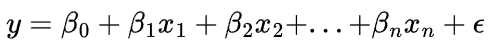


Donde:
- \(y\): Variable dependiente.
- β0: Intersección con el eje \(y\) (término independiente).
- β1,β2, .... βn: Coeficientes de las variables independientes.
- \(x_1, x_2, ..., x_n\): Variables independientes.
- ϵ: Error residual (diferencia entre valores predichos y reales).


### **Entrenamiento del Modelo**

In [ ]:
# Crear una instancia del modelo de Regresión Lineal
modelo_lineal = LinearRegression()

In [ ]:
# Entrenar el modelo con el conjunto de entrenamiento
modelo_lineal.fit(X_train, y_train)

LinearRegression()

## **Coeficientes del Modelo de Regresión Lineal**

En un modelo de **Regresión Lineal**, los coeficientes (β) indican la influencia de cada variable independiente en la variable dependiente. Estos coeficientes son fundamentales para interpretar la relación entre las variables predictoras (X) y el resultado (y).

### **Descripción:**
- Cada coeficiente refleja el cambio esperado en la variable dependiente (y) por un aumento unitario en la variable independiente correspondiente (x_i), manteniendo constantes las demás variables.
- Los coeficientes pueden ser positivos, negativos o cercanos a 0:
  - **Positivo**: La variable independiente tiene una relación directa con \(y\).
  - **Negativo**: La variable independiente tiene una relación inversa con \(y\).
  - **Cercano a 0**: La variable tiene poco impacto en \(y\).

In [ ]:
# Coeficientes del modelo
print("Coeficientes del modelo")
pd.DataFrame(modelo_lineal.coef_, X.columns, columns=['Coeficientes'])

Coeficientes del modelo


,Coeficientes
Años_Experiencia,0.005856
Edad,0.017886
Tasa_Rotación,1.587122
Crecimiento_Empresa,0.358288
Demanda_Actual_Talento,1.178481
Satisfaccion_Laboral,0.001161
Salario_Anual,-0.021338
Nivel_Educativo_Secundaria,-0.055563
Nivel_Educativo_Técnico,-0.074678
Nivel_Educativo_Universitario,-0.067015


## **Intercepto del Modelo de Regresión Lineal**

El **intercepto** (β0) en un modelo de regresión lineal representa el valor de la variable dependiente (\(y\)) cuando todas las variables independientes (\(x_1, x_2, ..., x_n\)) tienen un valor de 0. Es decir, es el punto donde la línea de regresión cruza el eje \(y\).


In [ ]:
# Intercepto del modelo
print(f"Intercepto del modelo: {modelo_lineal.intercept_:.4f}")

Intercepto del modelo: -0.4203


### **Evaluación del Modelo**

In [ ]:
# Realizar predicciones sobre el conjunto de prueba
y_pred_lineal = modelo_lineal.predict(X_test)

### Interpretación de Resultados
1. **RMSE:** Mide cuánto se desvían, en promedio, las predicciones de los valores reales. Un valor más bajo indica mejor desempeño.
2. **MAE:** Promedio de los errores absolutos, útil para entender los errores en las mismas unidades que la variable objetivo.
3. **R²:** Indica la proporción de la variabilidad en la variable objetivo que el modelo puede explicar. Un valor cercano a 1 indica un buen ajuste.


In [ ]:
# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred_lineal)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_lineal)
r2 = r2_score(y_test, y_pred_lineal)

print("Métricas de desempeño del modelo:")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Error Absoluto Medio (MAE): {mae:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

Métricas de desempeño del modelo:
Raíz del Error Cuadrático Medio (RMSE): 0.8821
Error Absoluto Medio (MAE): 0.6813
Coeficiente de Determinación (R²): 0.9968


### **Visualización y Análisis de Resultados**

### **Comparación entre Valores Reales y Predicciones**

El gráfico de dispersión entre los **valores reales** y las **predicciones** es una herramienta visual que permite evaluar el desempeño de un modelo de regresión. Este gráfico ayuda a identificar patrones, discrepancias y posibles sesgos en las predicciones.


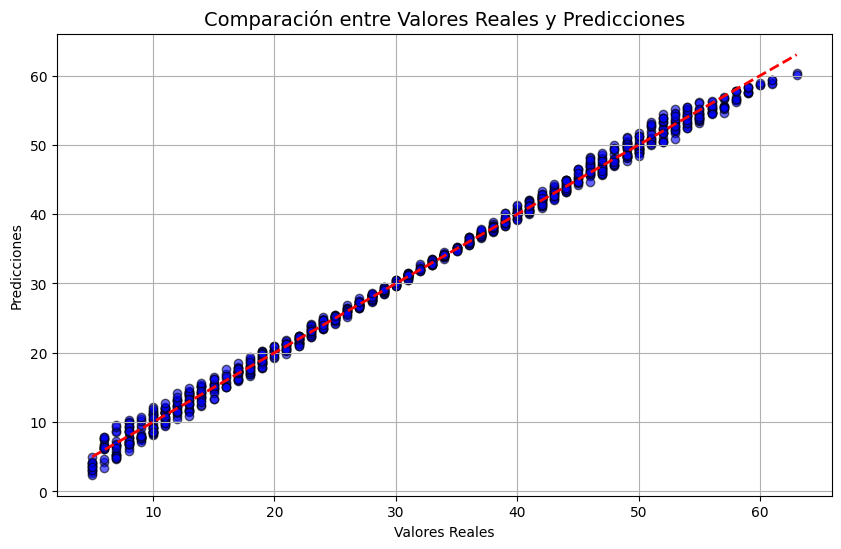

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lineal, alpha=0.6, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Comparación entre Valores Reales y Predicciones', fontsize=14)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.show()

## **Regresión Lasso (L1 Regularización)**

### **¿Qué es Lasso?**
La **regresión Lasso** es un modelo de regresión lineal regularizado que agrega una penalización basada en la magnitud absoluta de los coeficientes, lo que permite la selección automática de características.

### **Fórmula de la función de costo**
$$
J(\theta) = \sum (y_i - \hat{y}_i)^2 + \lambda \sum |\theta_j|
$$
Donde:
- $ \sum (y_i - \hat{y}_i)^2 $: Error cuadrático medio.
- $ \lambda $: Parámetro de regularización que controla la penalización.
- $ \sum |\theta_j| $: Suma de los valores absolutos de los coeficientes.

### **Efecto de Lasso**
- Reduce algunos coeficientes exactamente a 0, eliminando variables irrelevantes.
- Es útil para la selección de características en datasets con muchas variables.

### **Ajuste de Parámetro `alpha`**
El parámetro **`alpha`** controla la fuerza de la regularización:
- Valores altos de `alpha` → Mayor penalización, más variables eliminadas.
- Valores bajos de `alpha` → Menor penalización, modelo más parecido a una regresión lineal simple.


In [ ]:
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [ ]:
# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)

print("Métricas de desempeño del modelo:")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Error Absoluto Medio (MAE): {mae:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

Métricas de desempeño del modelo:
Raíz del Error Cuadrático Medio (RMSE): 0.8961
Error Absoluto Medio (MAE): 0.6913
Coeficiente de Determinación (R²): 0.9967


### **Comparación entre Valores Reales y Predicciones**

El gráfico de dispersión entre los **valores reales** y las **predicciones** es una herramienta visual que permite evaluar el desempeño de un modelo de regresión. Este gráfico ayuda a identificar patrones, discrepancias y posibles sesgos en las predicciones.


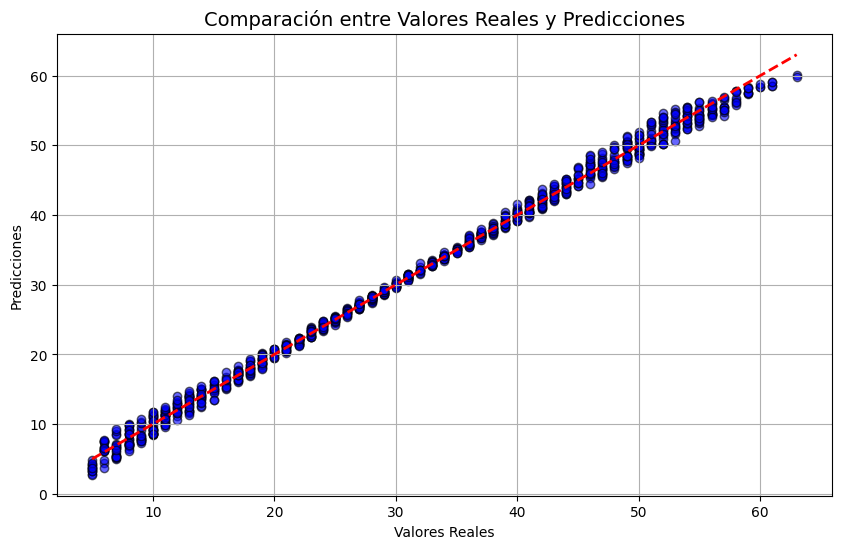

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.6, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Comparación entre Valores Reales y Predicciones', fontsize=14)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.show()

## **Regresión Ridge (L2 Regularización)**

### **¿Qué es Ridge?**
La **regresión Ridge** es un modelo de regresión lineal regularizado que agrega una penalización al error cuadrático medio para reducir la magnitud de los coeficientes y prevenir el sobreajuste.

**Fórmula de la función de costo**
$$
J(\theta) = \sum (y_i - \hat{y}_i)^2 + \lambda \sum \theta_j^2
$$
Donde:
- $ \sum (y_i - \hat{y}_i)^2 $: Error cuadrático medio.
- $ \lambda $: Parámetro de regularización que controla la penalización.
- $ \sum \theta_j^2 $: Suma de los cuadrados de los coeficientes.

### **Efecto de Ridge**
- Reduce la magnitud de los coeficientes de las variables menos relevantes.
- No elimina variables (sus coeficientes nunca llegan exactamente a 0).
- Es útil cuando las variables están correlacionadas.

### **Ajuste de Parámetro `alpha`**
El parámetro **`alpha`** controla la fuerza de la regularización:
- Valores altos de `alpha` → Mayor penalización, coeficientes más pequeños.
- Valores bajos de `alpha` → Menor penalización, modelo más parecido a una regresión lineal simple.


In [ ]:
ridge = Ridge(alpha=0.1, random_state=42)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [ ]:
# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)

print("Métricas de desempeño del modelo:")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Error Absoluto Medio (MAE): {mae:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

Métricas de desempeño del modelo:
Raíz del Error Cuadrático Medio (RMSE): 0.8821
Error Absoluto Medio (MAE): 0.6813
Coeficiente de Determinación (R²): 0.9968


### **Comparación entre Valores Reales y Predicciones**

El gráfico de dispersión entre los **valores reales** y las **predicciones** es una herramienta visual que permite evaluar el desempeño de un modelo de regresión. Este gráfico ayuda a identificar patrones, discrepancias y posibles sesgos en las predicciones.


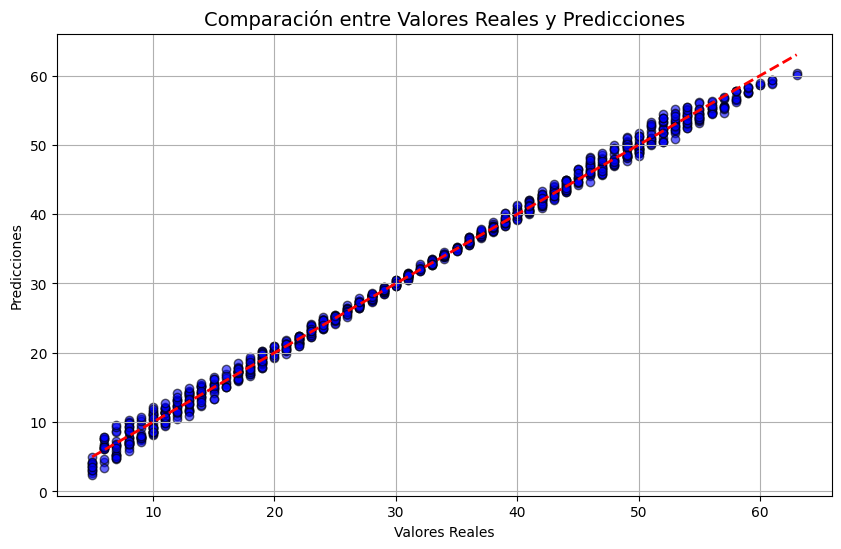

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.6, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Comparación entre Valores Reales y Predicciones', fontsize=14)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.show()

### **Comparación de Modelos por Coeficiente de Determinación (R²)**
En esta sección comparamos tres modelos de regresión: Regresión lineal, Ridge y Lasso. Se evalúan en función de su Coeficiente de Determinación para determinar cuál ofrece el mejor rendimiento en el conjunto de datos.

In [ ]:
r2_lineal = r2_score(y_test, y_pred_lineal)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Coeficiente de Determinación (R²) Regresión Lineal:", r2_lineal)
print("Coeficiente de Determinación (R²) Ridge:", r2_ridge)
print("Coeficiente de Determinación (R²) Lasso:", r2_lasso)

Coeficiente de Determinación (R²) Regresión Lineal: 0.9968348423262484
Coeficiente de Determinación (R²) Ridge: 0.9968348506413793
Coeficiente de Determinación (R²) Lasso: 0.9967336164234625


### **Tabla de Resultados Reales vs Predichos**
Aquí visualizamos una tabla que compara los valores reales con las predicciones del modelo Ridge, el cual ha mostrado el mejor desempeño en términos de precisión en este caso específico.

In [ ]:
resultados = pd.DataFrame({
    'Real': y_test,
    'Predicción': y_pred_ridge
})

resultados

,Real,Predicción
1501,17,16.385506
2586,21,21.834992
2653,15,14.442593
1055,46,45.748081
705,11,10.741253
...,...,...
4711,52,53.943283
2313,40,40.011483
3214,29,29.129825
2732,38,38.178292
